<a href="https://colab.research.google.com/github/TrongHvDev/AI/blob/main/Homework_week_5/DCServo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fuzzy Logic DC Servo

In [1]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=3340e807b114fdf6632b3753fb66eac8eb1d2be40657aa006d8d8b16bfbacab7
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [2]:
import  numpy as np
import skfuzzy as fzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axis3d 

In [3]:
#sai số e (0-2000RPM)
Universe_1 = np.linspace(0,1000,61)
#đạo hàm của sai số e (0-1000RPM)
Universe_2 = np.linspace(0,500,61)
#Điện áp cấp vào Động cơ DC (0-24V)
Universe_3 = np.linspace(0,24,61) 

e = ctrl.Antecedent(Universe_1,'e')
de= ctrl.Antecedent(Universe_2,'de')
V = ctrl.Consequent(Universe_3,'V')

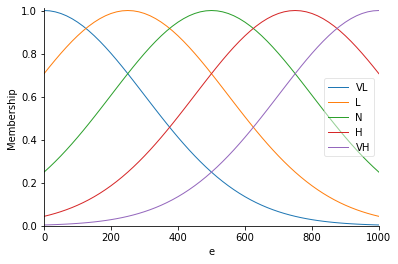

In [4]:
e['VL'] = fzz.gaussmf(e.universe,0,300)
e['L'] = fzz.gaussmf(e.universe,250,300)
e['N'] = fzz.gaussmf(e.universe,500,300)
e['H'] = fzz.gaussmf(e.universe,750,300)
e['VH'] = fzz.gaussmf(e.universe,1000,300)
e.view()

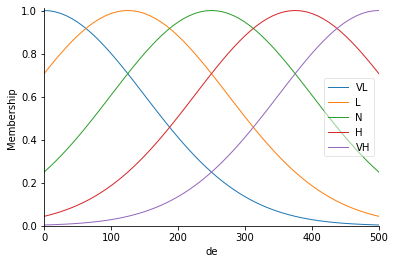

In [5]:
de['VL'] = fzz.gaussmf(de.universe,0,150)
de['L'] = fzz.gaussmf(de.universe,125,150)
de['N'] = fzz.gaussmf(de.universe,250,150)
de['H'] = fzz.gaussmf(de.universe,375,150)
de['VH'] = fzz.gaussmf(de.universe,500,150)
de.view()

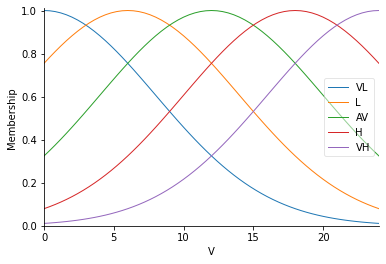

In [6]:
V['VL'] = fzz.gaussmf(V.universe,0,8)
V['L'] = fzz.gaussmf(V.universe,6,8)
V['AV'] = fzz.gaussmf(V.universe,12,8)
V['H'] = fzz.gaussmf(V.universe,18,8)
V['VH'] = fzz.gaussmf(V.universe,24,8)
V.view()

In [28]:
rule0 = ctrl.Rule(antecedent=((e['VL']&de['VL'])|(e['VL']&de['L'])|(e['L']&de['VL'])|(e['VL']&de['N'])|
                              (e['N']&de['VL'])), consequent= V['VL'])

rule1 = ctrl.Rule(antecedent=((e['H']&de['VL'])|(e['VL']&de['H'])|(e['N']&de['L'])|(e['L']&de['N'])|
                              (e['L']&de['L'])), consequent= V['L'])

rule2 = ctrl.Rule(antecedent=((e['VL']&de['VH'])|(e['VH']&de['VL'])|(e['L']&de['H'])|(e['H']&de['N'])|
                              (e['N']&de['H'])|(e['H']&de['L'])|(e['N']&de['N'])), consequent= V['AV'])

rule3 = ctrl.Rule(antecedent=((e['VH']&de['L'])|(e['L']&de['VH'])|
                              (e['H']&de['H'])), consequent= V['H'])

rule4 = ctrl.Rule(antecedent=((e['VH']&de['VH'])|(e['VH']&de['H'])|(e['H']&de['VH'])|(e['VH']&de['N'])|
                              (e['N']&de['VH'])), consequent= V['VH'])

In [29]:
System  = ctrl.ControlSystem([rule0, rule1, rule2, rule3, rule4])
sim = ctrl.ControlSystemSimulation(System, flush_after_run= 61*61+1)
upSampled1 = np.linspace(0,1000,61)
upSampled2 = np.linspace(0,500,61)
x,y = np.meshgrid(upSampled1, upSampled2)
z = np.zeros_like(x)

for i in range(61):
  for j in range(61):
    sim.input['e']= x[i,j]
    sim.input['de']=y[i,j]
    sim.compute()
    z[i,j]=sim.output['V']
     

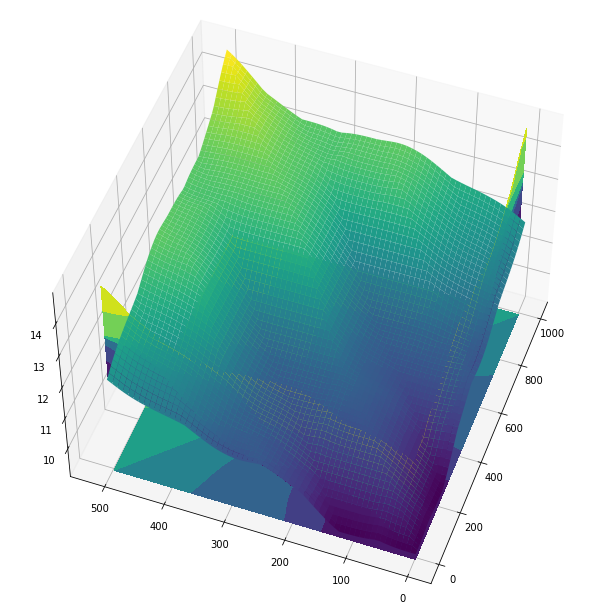

In [30]:
fig = plt.figure(figsize =(11,11))
ax = fig.add_subplot(111,projection = '3d')
suf = ax.plot_surface(x,y,z, rstride= 1, cstride= 1, cmap = 'viridis',
                      linewidth= 0.4, antialiased= True)
cset = ax.contourf(x,y,z, zdir= 'z', offset= 9, cmap= 'viridis')
cset = ax.contourf(x,y,z, zdir= 'x', offset= 9, cmap= 'viridis')
cset = ax.contourf(x,y,z, zdir= 'y', offset= 9, cmap= 'viridis')
ax.view_init(50,200)